In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
data = pd.read_csv("C:/Users/nil17/Desktop/College/LabMaterial/DSLab/New Folder/archive/insurance.csv")

In [3]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
data.shape

(1338, 7)

In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Data Preprocessing

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data.sex)
data.sex = le.transform(data.sex)
le.fit(data.smoker) 
data.smoker = le.transform(data.smoker)
le.fit(data.region) 
data.region = le.transform(data.region)

In [7]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [8]:
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

# Visualizing Data

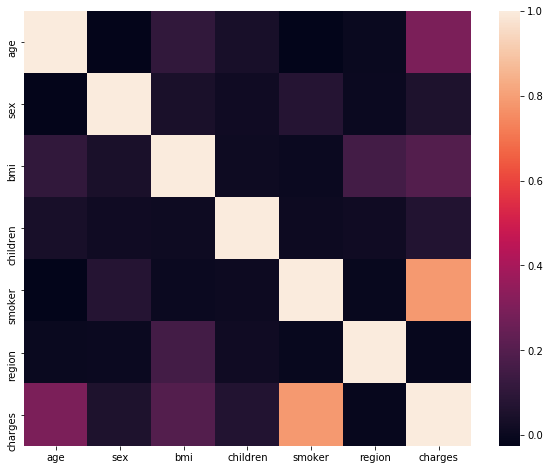

In [9]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr)

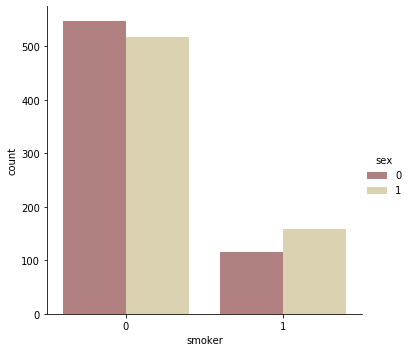

In [10]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=data)

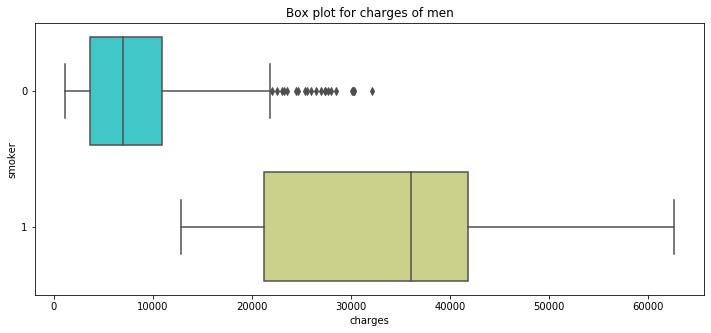

In [11]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 1)] , orient="h", palette = 'rainbow')

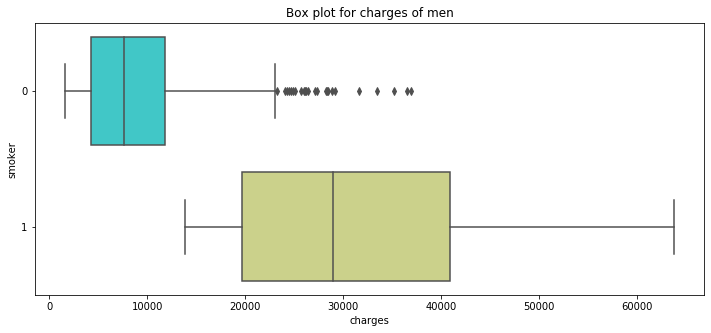

In [12]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 0)] , orient="h", palette = 'rainbow')

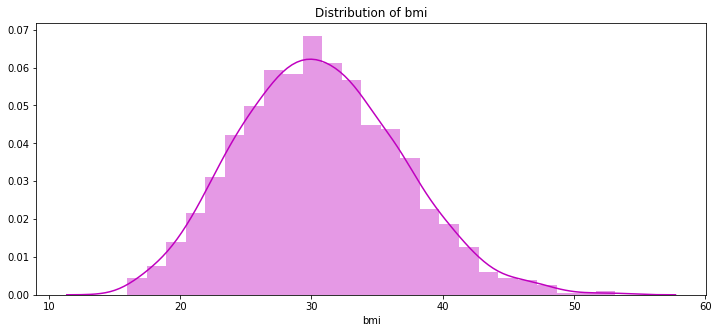

In [13]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color = 'm')

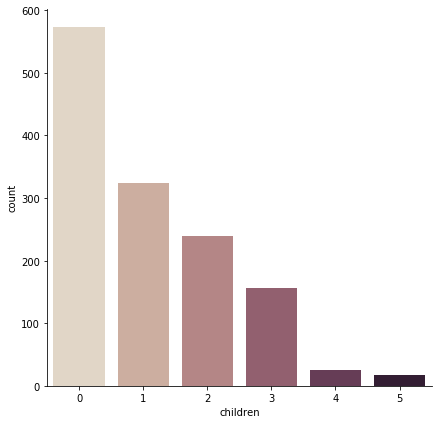

In [14]:
sns.catplot(x="children", kind="count", palette="ch:.25", data=data, height = 6)

# Model Building

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [16]:
x = data.drop(['charges'], axis = 1)
y = data.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)

# Linear Regression

In [17]:
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))
print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,lr.predict(x_train)),
mean_squared_error(y_test,lr.predict(x_test))))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,lr.predict(x_train)),
r2_score(y_test,lr.predict(x_test))))

0.7962732059725786
MSE train data: 38050102.806, MSE test data: 32073628.560
R2 train data: 0.734, R2 test data: 0.796


# Error Analysis of LR model

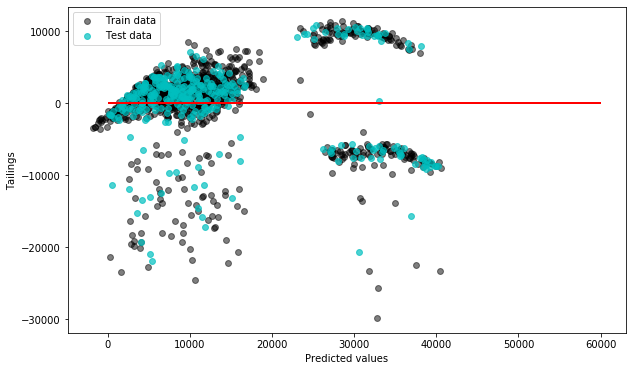

In [18]:
plt.figure(figsize=(10,6))

plt.scatter(lr.predict(x_train),lr.predict(x_train) - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(lr.predict(x_test),lr.predict(x_test) - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()

# Decision Tree

In [19]:
from sklearn import tree
dt = tree.DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [20]:
print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,dt.predict(x_train)),
mean_squared_error(y_test,dt.predict(x_test))))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,dt.predict(x_train)),
r2_score(y_test,dt.predict(x_test))))

MSE train data: 77906.488, MSE test data: 42377284.516
R2 train data: 0.999, R2 test data: 0.731


# Error Analysis of DT model

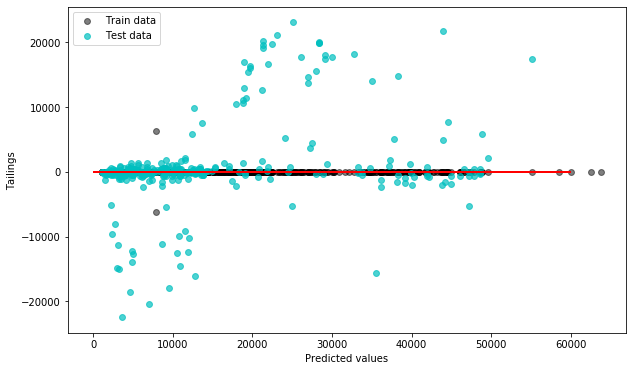

In [21]:
plt.figure(figsize=(10,6))

plt.scatter(dt.predict(x_train),dt.predict(x_train) - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(dt.predict(x_test),dt.predict(x_test) - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()

# RandomForest

In [22]:
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(x_train,y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 3729086.094, MSE test data: 19933823.142
R2 train data: 0.974, R2 test data: 0.873


# Error Analysis of RF model

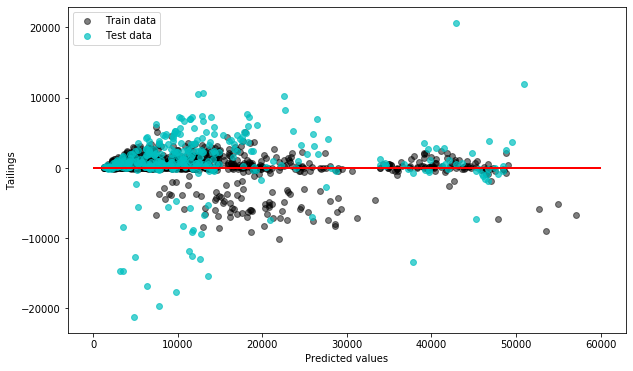

In [23]:
plt.figure(figsize=(10,6))

plt.scatter(forest_train_pred,forest_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(forest_test_pred,forest_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()

# Saving Model

In [26]:
filename = 'random-forest_model.sav'
pickle.dump(forest, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(f"Random Forest Model Accuracy: %1.3f" %(result*100), "%")

Random Forest Model Accuracy: 87.338 %


# Linear Regression with Less Feature

In [ ]:
temp_x = x_train[['bmi','age','smoker']]

In [ ]:
temp_x

In [ ]:
temp_test_x = x_test[['bmi','age','smoker']]

In [ ]:
lr = LinearRegression().fit(temp_x,y_train)

y_train_pred = lr.predict(temp_x)
y_test_pred = lr.predict(temp_test_x)

print(lr.score(temp_test_x,y_test))